Mak1ma2 

This is going to be a sample on how to create a classifier model. 
- Classifier vs Regressor? A: It's easier to understand the difference between a classifier model and a regressor model based on their general purpose. For classifier model the user wishes to input values into models to "classify" them to a certain label (ex: trained models using colors of the rainbow -> input light red -> model should output red (model classified "light red" as red <-- an already established label)). For regressor model the user wishes to input values into models to predict the future values (ex: trained models using values of shipments that flows through one warehouse -> input future dates -> model should output predicted values of shipments that'll pass through throughout the inputted dates).  

While going through this exercise / demo you'll have 3 csv files in the same repo. You can look at the code for an idea of where to start from, but I highly encourage the reader to attempt writing the code based on the steps commented in the beginning and doing analysis and understanding the dataset given and it's relation to the scenario

In [90]:
#Prompt

"""
Scenario: A teacher is trying to input in over 200 student's grade from their recent exam (converting their numerical value to a letter grade in their gradebook) 
          BUT the conversion isn't as simple as 91 - 93 : A, 94 - 100 : A+ since the rest of the teachers hid the grade scale for no reason ! (not a very good school staff) 
          Because of that this teacher plans on using the other teacher's gradebook that they left behind to predict the range of the grade scale 
"""

#use these imports 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import random
import csv 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
#read the csv files into a dataset 

df = pd.read_csv('teacher1.csv') 
df2 = pd.read_csv('teacher2.csv') 
df3 = pd.read_csv('teacher3.csv')
print(df) 
print(df2) 
print(df3)

                 Name  Student id     sex  overall gpa  grade on recent exam  \
0          John Haley           0    male         3.69                    48   
1      Timothy Ritter           1  female         2.01                    23   
2       Jennifer Hart           2    male         2.31                    44   
3         Chad Hughes           3    male         3.79                     6   
4      Jason Gonzalez           4    male         2.43                     4   
..                ...         ...     ...          ...                   ...   
255  Charles Phillips         255    male         3.32                    99   
256       John Hinton         256  female         2.05                    98   
257         Raven Kim         257  female         2.88                    99   
258     Andrea Palmer         258  female         2.20                    97   
259      Mary Stevens         259  female         2.02                    98   

    letter grade on recent exam  gym_ex

What do you notice within each dataset (whatever you notice)? What do we need to answer the prompt? <-- What do we need, What do we not need 
Answer these questions by yourself before moving on, as for the first question you may graph it out 

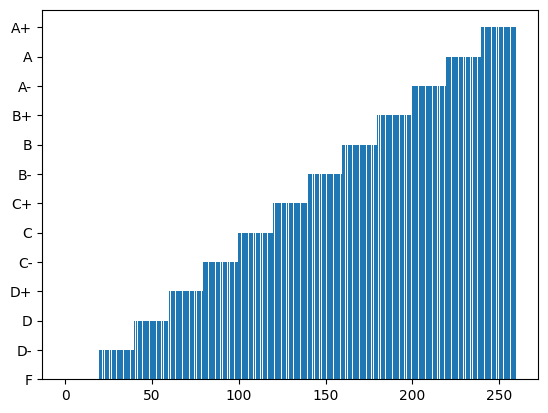

In [92]:
#graphing out each dataset onto a bar graph 

plt.bar(df['Student id'], df['letter grade on recent exam'])
plt.show() 

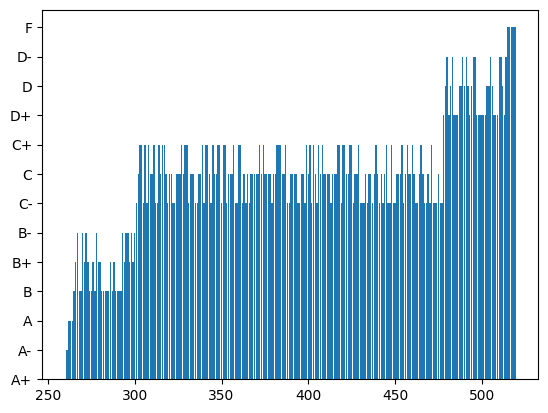

In [93]:
plt.bar(df2['Student id'], df2['letter grade on recent exam'])
plt.show() 

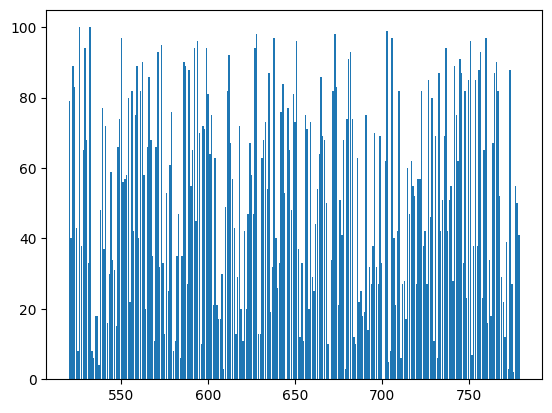

In [94]:
plt.bar(df3['Student id'], df3['grade on recent exam'])
plt.show() 

#keep in mind that you can look at graphs however you want, I personally chose bar graphs to see the correlation between columns, but if you want to see something in another way go for it

In [95]:
"""
What do you notice within this dataset? A: *situational* ex: I noticed that there is a lump of students that have a grade letter F with range 1 through 54 in dataset 1 
What do we need to answer the prompt? A: the key phrases given in the prompt were "grade conversion", "grade scale", "other teacher's gradebook"  
- What do we need? A: we will need numerical grades and their respective letter grade which will be "grade on recent exam" and "letter grade on recent exam" column 
- What do we not need? A: everything else will be unecessary since we don't need names, student it, sex, overall gpa, gym_exam_score 
"""

#now that we identified what we need and don't need we'll create a dataframe that we need 
#since we're going to be using every teacher's gradebook we're going to combine all the datasets together 

numerical_grade = [] 
letter_grade = [] 

numerical_grade.append(df[['grade on recent exam']])
numerical_grade.append(df2[['grade on recent exam']])
numerical_grade.append(df3[['grade on recent exam']])

letter_grade.append(df[['letter grade on recent exam']])
letter_grade.append(df2[['letter grade on recent exam']])
letter_grade.append(df3[['letter grade on recent exam']])

x_frame = pd.concat(numerical_grade, ignore_index=True) 
y_frame = pd.concat(letter_grade, ignore_index=True) 

#keep in mind that models only work with 2 dimensional arrays so print the shape to check 
# 1 dimensional should print: (#,) whereas 2 dimensional prints: (#,#)
print(x_frame.shape) 

(780, 1)


In [96]:
#since we don't necessarily have a separate train and test dataset we'll be splitting our existing frames into train and test datasets

#test size is as the name suggests, determine the portion of the data to be part of the test split 
test_size = 0.2 
#random_state allows reproducibility as the function shuffles the data in the same order prior to the split
random_state = 42

#why 42? Well the value 42 is the Answer to the Ultimate Question of Life, the Universe, and Everything! 🌌🤓

X_train, X_val, y_train, y_val = train_test_split(x_frame, y_frame, test_size=test_size, random_state=random_state)

Now we get to the actual model part, we'll be using the sklearn library models for this exercise which contains these list of classifiers 
- from sklearn.tree import ExtraTreeClassifier
- from sklearn.tree import DecisionTreeClassifier
- from sklearn.svm.classes import OneClassSVM
- from sklearn.neural_network.multilayer_perceptron import MLPClassifier
- from sklearn.neighbors.classification import RadiusNeighborsClassifier
- from sklearn.neighbors.classification import KNeighborsClassifier
- from sklearn.multioutput import ClassifierChain
- from sklearn.multioutput import MultiOutputClassifier
- from sklearn.multiclass import OutputCodeClassifier
- from sklearn.multiclass import OneVsOneClassifier
- from sklearn.multiclass import OneVsRestClassifier
- from sklearn.linear_model.stochastic_gradient import SGDClassifier
- from sklearn.linear_model.ridge import RidgeClassifierCV
- from sklearn.linear_model.ridge import RidgeClassifier
- from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
- from sklearn.gaussian_process.gpc import GaussianProcessClassifier
- from sklearn.ensemble.voting_classifier import VotingClassifier
- from sklearn.ensemble.weight_boosting import AdaBoostClassifier
- from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
- from sklearn.ensemble.bagging import BaggingClassifier
- from sklearn.ensemble.forest import ExtraTreesClassifier
- from sklearn.ensemble.forest import RandomForestClassifier
- from sklearn.naive_bayes import BernoulliNB
- from sklearn.calibration import CalibratedClassifierCV
- from sklearn.naive_bayes import GaussianNB
- from sklearn.semi_supervised import LabelPropagation
- from sklearn.semi_supervised import LabelSpreading
- from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
- from sklearn.svm import LinearSVC
- from sklearn.linear_model import LogisticRegression
- from sklearn.linear_model import LogisticRegressionCV
- from sklearn.naive_bayes import MultinomialNB  
- from sklearn.neighbors import NearestCentroid
- from sklearn.svm import NuSVC
- from sklearn.linear_model import Perceptron
- from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
- from sklearn.svm import SVC
- from sklearn.mixture import DPGMM
- from sklearn.mixture import GMM 
- from sklearn.mixture import GaussianMixture
- from sklearn.mixture import VBGMM
copied from https://stackoverflow.com/a/54988354 since it's 3-4 years old, the import might be different so keep in mind when messing around with them 
ex: sklearn changed so instead of "from sklearn.ensemble.forest import RandomForestClassifier" it's "from sklearn.ensemble import RandomForestClassifier" 

In [97]:
#create a classifier model including fitting train values and get the accuracy score

#for simplicity sake I won't demand to go through every classifier and cross check for highest accuracy so we'll be using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#keep in mind that all Classifiers have parameters that you can modify to get a little bit more accuracy, keep in mind for that when using them
model = DecisionTreeClassifier() 
model.fit(X_train, y_train) 

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) 
print(accuracy) 

1.0


In [98]:
#now that we have our model ready let's create our own sample student size with size 260

students = []
#since all our csv sizes were 260 I'll do the same here
for _ in range(260): 
    #for time sake I'll just randomize the student's exam score, if you wish then you can use an algorithm to get a list of student's scores 
    students.append(random.randint(0, 100)) 

student_pd = pd.DataFrame(students) 
print(student_pd.shape)

(260, 1)


In [99]:
#run your student sample through the model and create a new csv for it

students_letter = model.predict(student_pd) 
#example of how it should look like in the end 
print(f"student received {students[0]} with letter grade of {students_letter[0]}") 

#convert it to a csv 
data = [['numerical grade', 'letter grade']] 
for i in range(len(students)): 
    data.append([students[i], students_letter[i]])

with open('final.csv', 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerows(data) 

csvfile.close()

student received 69 with letter grade of D+


c:\Users\go7jo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


When I designed this scenario I decided that the range will be 
- <60% F, 60-62% D-, 63-66% D, 67-69% D+, 70-72% C-, 73-76% C, 77-79% C+, 80-82% B-, 83-86% B, 87-89% B+, 90-92% A-, 93-96% A, 97-100% A+
with 3 "teachers" where
1. first teacher will have equal ratio between each letter <-- to give the model a basic gist of what each range is
2. second will have a form of bell curve <-- simulate a stereotypical grade distribution 
3. third that will be randomly generated <-- dealing / showing the "unknown", if the random generation ends up with equal ratio then the model will have better understanding of the overall range or it might be highly accurate on one compared ot the other

the main purpose of this Python notebook is to 
1. inform the reader of the differences between a Classifier and a Regressor 
2. To emphasize the importance of pattern recognition as well as finding the connections between columns that we require and columns we don't require 
3. Although I techincally gave the answer / range now, that the reader knows how to uitilize values from a dataset to figure out the "unknown" 

In [100]:
#now that we know what the range is, let's test out if our model accurately got the range 
#let's take the maximum and see the result
test = [59, 60, 62, 63, 66, 67, 69, 70, 72, 73, 76, 77, 79, 80, 82, 83, 86, 87, 89, 90, 92, 93, 96, 97, 100]
test_actual = ["F", "D-", "D-", "D", "D", "D+", "D+", "C-", "C-", "C", "C", "C+", "C+", "B-", "B-", "B", "B", "B+", "B+", "A-", "A-", "A", "A", "A+", "A+"] 
test_df = pd.DataFrame(test) 
test_predict = model.predict(test_df) 

accuracy = accuracy_score(test_actual, test_predict) 
print(f"accuracy: {(int)(accuracy*100)}%") 

accuracy: 100%


c:\Users\go7jo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


I hope this helped you understand more on how to analyze a data -> shape the data for your purpose -> use classifier -> confirm classifier model's accuracy 